# CHIPS-CVN Evaluation Notebook

In [1]:
# Import all the required modules and call the gpu_setup utility
import time
from array import array

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import ROOT
from root_numpy import fill_hist

import chipscvn.utils as utils
import chipscvn.config as config
import chipscvn.data as data
import chipscvn.models as models
import chipscvn.evaluators as evaluators
utils.gpu_setup()  # Setup the GPU's
ROOT.gStyle.SetOptStat(0)

/mnt/storage/jtingey/chips-cvn/env/miniconda/envs/chips-cvn/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Welcome to JupyROOT 6.18/04
---  4 Physical GPUs, 4 Logical GPUs ---


In [2]:
# Load the trained models from the configuration and run the evaluator
conf = config.get("config/eval.yml")
evaluator = utils.get_evaluator(conf)
evaluator.run()

--- Running Evaluation ---

--- running inference...

--- parsing outputs...

--- calculating weights...

Total-> Nuel: 18420, Numu: 18634, Cosmic: 15554

Weights-> Nuel:0.0043, Numu:0.1830, Cosmic:77.8383

--- calculating cuts...

Cat 0-> Total 14994, Survived: 0.9095638255302121

Cat 1-> Total 14946, Survived: 0.8847183192827512

Cat 2-> Total 7114, Survived: 0.5614281698060163

Cat 3-> Total 15554, Survived: 0.00045004500450045

--- Done (took 168.3068826198578 seconds) ---



2020-03-17 13:02:24.503354: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2020-03-17 13:02:24.804536: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7


In [3]:
# Plot the cosmic output which we cut on
%jsroot on
hists, leg = evaluator.make_cat_plot('cosmic_output', 50, 0, 1, 'norm', False)
c = ROOT.TCanvas("cosmic_output", 'cosmic_output', 800, 600)
for hist in hists:
    hist.Draw("HISTSAME")
leg.Draw()
c.Draw()

In [4]:
# Plot the 'raw_total_digi_q' which we cut on
hists, leg = evaluator.make_cat_plot('raw_total_digi_q', 40, 0, 5000, 'norm', False)
hists.reverse()
c = ROOT.TCanvas("raw_total_digi_q", 'raw_total_digi_q', 800, 600)
for hist in hists:
    hist.Draw("HISTSAME")
leg.Draw()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: h_0 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_2 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_3 (Potential memory leak).


In [5]:
# Plot the 'first_ring_height' which we cut on
hists, leg = evaluator.make_cat_plot('first_ring_height', 40, 0, 5000, 'norm', False)
hists.reverse()
c = ROOT.TCanvas("first_ring_height", 'first_ring_height', 800, 600)
for hist in hists:
    hist.Draw("HISTSAME")
leg.Draw()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: h_0 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_2 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_3 (Potential memory leak).


In [6]:
# Plot the 'reco_dirTheta' which we cut on
hists, leg = evaluator.make_cat_plot('reco_dirTheta', 64, -1, 1, 'norm', False)
hists.reverse()
c = ROOT.TCanvas("reco_dirTheta", 'reco_dirTheta', 800, 600)
for hist in hists:
    hist.Draw("HISTSAME")
leg.Draw()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: h_0 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_2 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_3 (Potential memory leak).


In [7]:
# Plot the 'reco_dirPhi' which we cut on
hists, leg = evaluator.make_cat_plot('reco_dirPhi', 64, -1, 1, 'norm', False)
c = ROOT.TCanvas("reco_dirPhi", 'reco_dirPhi', 800, 600)
for hist in hists:
    hist.Draw("HISTSAME")
leg.Draw()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: h_0 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_2 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_3 (Potential memory leak).


In [8]:
# Plot the 'nuel_cc_combined' with the cuts applied and normalised per event type
hists, leg = evaluator.make_cat_plot('nuel_cc_combined',40, 0, 1, 'norm', True)
c = ROOT.TCanvas("nuel_cc_combined", 'nuel_cc_combined', 800, 600)
for hist in hists:
    hist.Draw("HISTSAME")
leg.Draw()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: h_0 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_2 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_3 (Potential memory leak).


In [9]:
# Plot the 'numu_cc_combined' with the cuts applied and normalised per event type
hists, leg = evaluator.make_cat_plot('numu_cc_combined',40, 0, 1, 'norm', True)
c = ROOT.TCanvas("numu_cc_combined", 'numu_cc_combined', 800, 600)
for hist in hists:
    hist.Draw("HISTSAME")
leg.Draw()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: h_0 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_2 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_3 (Potential memory leak).


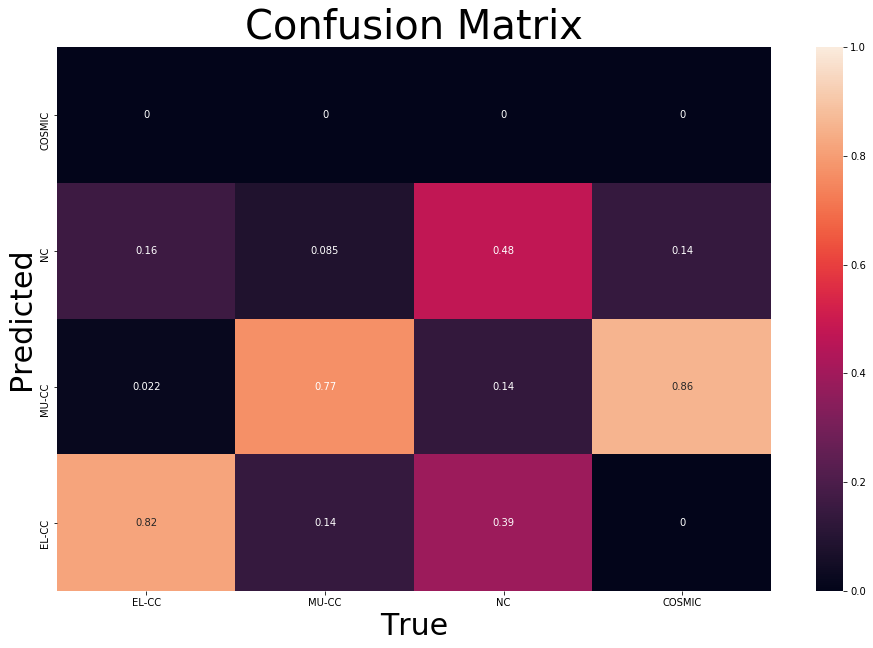

In [10]:
# Plot a confusion matrix for events that pass the cut
def pred_classifier(event):
    combined_values = [event['nuel_cc_combined'], event['numu_cc_combined'], event['beam_output_8']]
    return np.asarray(combined_values).argmax()

selection = evaluator.events[evaluator.events.cut == False]
selection['pred_cat_combined'] = selection.apply(pred_classifier, axis=1)
selection["pred_cat_combined"] = selection["pred_cat_combined"].astype('int')

matrix = confusion_matrix(selection["true_cat_combined"], selection["pred_cat_combined"], normalize='true')
matrix_transpose = np.rot90(matrix, 1)
df_cm = pd.DataFrame(matrix_transpose, 
                     index = ["COSMIC", "NC", "MU-CC", "EL-CC"],
                     columns = ["EL-CC", "MU-CC", "NC", "COSMIC"])
plt.figure(figsize=(16,10))
sns.heatmap(df_cm, annot=True, vmin=0.0, vmax=1.0)
plt.title('Confusion Matrix', fontsize = 40) # title with fontsize 20
plt.xlabel('True', fontsize = 30) # x-axis label with fontsize 15
plt.ylabel('Predicted', fontsize = 30) # y-axis label with fontsize 15
plt.show()

In [11]:
# Print a Sklearn classification report
axis_labels = ["EL-CC", "MU-CC", "NC", "COSMIC"]
print(classification_report(selection["true_cat_combined"], selection["pred_cat_combined"], target_names=axis_labels))

              precision    recall  f1-score   support

       EL-CC       0.76      0.82      0.79     13638
       MU-CC       0.92      0.77      0.84     13223
          NC       0.36      0.48      0.41      3994
      COSMIC       0.00      0.00      0.00         7

    accuracy                           0.75     30862
   macro avg       0.51      0.52      0.51     30862
weighted avg       0.78      0.75      0.76     30862



In [12]:
# Run a scan on nuel_cc_combined cuts to find maximum efficiency*purity
eff_array = evaluator.events

nuelCCTot = eff_array[eff_array.true_cat_combined == 0]['weight'].sum()
numuCCTot = eff_array[eff_array.true_cat_combined == 1]['weight'].sum()
ncTot = eff_array[eff_array.true_cat_combined == 2]['weight'].sum()
cosmicTot = eff_array[eff_array.true_cat_combined == 3]['weight'].sum()
 
eff_sig, eff_bkg, pur, fom, cut = array('d'), array('d'), array('d'), array('d'), array('d')

bins = 99
maxFOM = 0.0
maxFomCut = 0
for bin in range(bins):
    cut.append((bin * 0.01) + 0.01)
    
    nuelCCCut = eff_array[(eff_array.true_cat_combined == 0) & 
                          (eff_array.cut == 0) & 
                          (eff_array.nuel_cc_combined > cut[bin])]['weight'].sum()
    
    numuCCCut = eff_array[(eff_array.true_cat_combined == 1) & 
                          (eff_array.cut == 0) & 
                          (eff_array.nuel_cc_combined > cut[bin])]['weight'].sum()
    
    ncCut = eff_array[(eff_array.true_cat_combined == 2) & 
                      (eff_array.cut == 0) & 
                      (eff_array.nuel_cc_combined > cut[bin])]['weight'].sum()
    
    cosmicCut = eff_array[(eff_array.true_cat_combined == 3) & 
                          (eff_array.cut == 0) & 
                          (eff_array.nuel_cc_combined > cut[bin])]['weight'].sum()
    

    eff_sig.append(nuelCCCut/nuelCCTot)
    eff_bkg.append((numuCCCut+ncCut+cosmicCut)/(numuCCTot+ncTot+cosmicTot))
    pur.append(nuelCCCut/(nuelCCCut++numuCCCut++ncCut+cosmicCut))
    fom.append(eff_sig[bin]*pur[bin])
    
    #print("Cut: {0:.4f}, Sig Eff:{1:.4f}, Bkg Eff: {2:.4f}, Pur: {3:.4f}, Fom: {4:.4f}".format(cut[bin], eff_sig[bin], eff_bkg[bin], pur[bin], fom[bin]))

    if fom[bin] > maxFOM: 
        maxFOM = fom[bin] 
        maxFomCut = cut[bin]
        
print("Max FOM: {}, At: {}".format(maxFOM, maxFomCut))

Max FOM: 0.0996222715361378, At: 0.73


In [13]:
eff_sig_gr = ROOT.TGraph(bins, cut, eff_sig)
eff_bkg_gr = ROOT.TGraph(bins, cut, eff_bkg)
pur_gr = ROOT.TGraph(bins, cut, pur)
fom_gr = ROOT.TGraph(bins, cut, fom)

c = ROOT.TCanvas("c", "", 800, 600)
c.cd()

eff_sig_gr.SetLineColor(ROOT.kGreen)     
eff_sig_gr.SetLineWidth(2)
eff_sig_gr.SetMarkerColor(ROOT.kGreen)
eff_sig_gr.SetTitle("Scan across nuel_cc_combined cut")
eff_sig_gr.GetXaxis().SetTitle('nuel_cc_combined cut')
eff_sig_gr.GetXaxis().SetRangeUser(0, 1)
eff_sig_gr.Draw("sameALP")

eff_bkg_gr.SetLineColor(ROOT.kBlue)     
eff_bkg_gr.SetLineWidth(2)
eff_bkg_gr.SetMarkerColor(ROOT.kBlue)
eff_bkg_gr.Draw("sameLP")

pur_gr.SetLineColor(ROOT.kRed)     
pur_gr.SetLineWidth(2)
pur_gr.SetMarkerColor(ROOT.kRed)
pur_gr.Draw("sameLP")

fom_gr.SetLineColor(ROOT.kBlack)     
fom_gr.SetLineWidth(2)
fom_gr.SetMarkerColor(ROOT.kBlack)
fom_gr.Draw("sameLP")

leg = ROOT.TLegend(0.15, 0.65, 0.35, 0.85)
leg.AddEntry(eff_sig_gr, "Sig Eff", "LP")
leg.AddEntry(eff_bkg_gr, "Bkg Eff", "LP")
leg.AddEntry(pur_gr, "Sig Purity", "LP")
leg.AddEntry(fom_gr, "FOM", "LP")
leg.SetTextSize(0.03)
leg.SetTextFont(42)
leg.SetFillColor(42)
leg.SetFillStyle(1001)
leg.Draw()

c.Update()
c.Draw()

In [14]:
# Generate efficiency and purity histograms using the maximised FOM
nuelCCAll = eff_array[eff_array.true_cat_combined == 0]
nuelCCSel = eff_array[(eff_array.true_cat_combined == 0) & (eff_array.cut == 0) & (eff_array.nuel_cc_combined > maxFomCut)]
nuelCCAll_h = ROOT.TH1F("nuelCCAll", "", 8, 1000, 5000)
nuelCCSel_h = ROOT.TH1F("nuelCCSel", "", 8, 1000, 5000)
nuelCCAll_h.Sumw2()
nuelCCSel_h.Sumw2()
fill_hist(nuelCCAll_h, nuelCCAll['true_nuEnergy'].to_numpy(), nuelCCAll['weight'].to_numpy())
fill_hist(nuelCCSel_h, nuelCCSel['true_nuEnergy'].to_numpy(), nuelCCSel['weight'].to_numpy())
nuelCCEff = ROOT.TGraphAsymmErrors(nuelCCSel_h, nuelCCAll_h, "n")

numuCCAll = eff_array[eff_array.true_cat_combined == 1]
numuCCSel = eff_array[(eff_array.true_cat_combined == 1) & (eff_array.cut == 0) & (eff_array.nuel_cc_combined > maxFomCut)]
numuCCAll_h = ROOT.TH1F("numuCCAll", "", 8, 1000, 5000)
numuCCSel_h = ROOT.TH1F("numuCCSel", "", 8, 1000, 5000)
numuCCAll_h.Sumw2()
numuCCSel_h.Sumw2()
fill_hist(numuCCAll_h, numuCCAll['true_nuEnergy'].to_numpy(), numuCCAll['weight'].to_numpy())
fill_hist(numuCCSel_h, numuCCSel['true_nuEnergy'].to_numpy(), numuCCSel['weight'].to_numpy())
numuCCEff = ROOT.TGraphAsymmErrors(numuCCSel_h, numuCCAll_h, "n")

ncAll = eff_array[eff_array.true_cat_combined == 2]
ncSel = eff_array[(eff_array.true_cat_combined == 2) & (eff_array.cut == 0) & (eff_array.nuel_cc_combined > maxFomCut)]
ncAll_h = ROOT.TH1F("ncAll", "", 8, 1000, 5000)
ncSel_h = ROOT.TH1F("ncSel", "", 8, 1000, 5000)
ncAll_h.Sumw2()
ncSel_h.Sumw2()
fill_hist(ncAll_h, ncAll['true_nuEnergy'].to_numpy(), ncAll['weight'].to_numpy())
fill_hist(ncSel_h, ncSel['true_nuEnergy'].to_numpy(), ncSel['weight'].to_numpy())
ncEff = ROOT.TGraphAsymmErrors(ncSel_h, ncAll_h, "n")

cosmicAll = eff_array[eff_array.true_cat_combined == 3]
cosmicSel = eff_array[(eff_array.true_cat_combined == 3) & (eff_array.cut == 0) & (eff_array.nuel_cc_combined > maxFomCut)]
cosmicAll_h = ROOT.TH1F("cosmicAll", "", 8, 1000, 5000)
cosmicSel_h = ROOT.TH1F("cosmicSel", "", 8, 1000, 5000)
cosmicAll_h.Sumw2()
cosmicSel_h.Sumw2()
fill_hist(cosmicAll_h, cosmicAll['true_nuEnergy'].to_numpy(), cosmicAll['weight'].to_numpy())
fill_hist(cosmicSel_h, cosmicSel['true_nuEnergy'].to_numpy(), cosmicSel['weight'].to_numpy())
cosmicEff = ROOT.TGraphAsymmErrors(cosmicSel_h, cosmicAll_h, "n")

signal = eff_array[(eff_array.true_cat_combined == 0) & (eff_array.cut == 0) & (eff_array.nuel_cc_combined > maxFomCut)]
total = eff_array[(eff_array.cut == 0) & (eff_array.nuel_cc_combined > maxFomCut)]
signal_h = ROOT.TH1F("signal", "", 8, 1000, 5000)
total_h = ROOT.TH1F("total", "", 8, 1000, 5000)
signal_h.Sumw2()
total_h.Sumw2()
fill_hist(signal_h, signal['true_nuEnergy'].to_numpy(), signal['weight'].to_numpy())
fill_hist(total_h, total['true_nuEnergy'].to_numpy(), total['weight'].to_numpy())
purity = ROOT.TGraphAsymmErrors(signal_h, total_h, "n")

In [15]:
# Make a efficiency and purity plot as a function of neutrino energy
eff_c = ROOT.TCanvas("eff_c", "", 800, 600)
eff_c.cd()

hempty = ROOT.TH2F("hempty", ";Neutrino Energy (MeV); Efficiency or Purity", 1, 1000, 5000, 10, 0, 1)
hempty.GetXaxis().SetTitleSize(0.06)  
hempty.GetYaxis().SetTitleSize(0.06) 
hempty.GetXaxis().CenterTitle()
hempty.GetXaxis().SetTitleOffset(0.8)  
hempty.GetYaxis().SetTitleOffset(0.8) 
hempty.GetYaxis().CenterTitle()
hempty.GetXaxis().SetLabelSize(0.05)    
hempty.GetYaxis().SetLabelSize(0.05)
hempty.Draw()

nuelCCEff.SetLineColor(ROOT.kGreen)     
nuelCCEff.SetLineWidth(2)
nuelCCEff.SetMarkerSize(1.2)    
nuelCCEff.SetMarkerStyle(20)
nuelCCEff.SetMarkerColor(ROOT.kGreen)
nuelCCEff.Draw("sameP")

numuCCEff.SetLineColor(ROOT.kBlue)     
numuCCEff.SetLineWidth(2)
numuCCEff.SetMarkerSize(1.2)    
numuCCEff.SetMarkerStyle(20)
numuCCEff.SetMarkerColor(ROOT.kBlue)
numuCCEff.Draw("sameP")

ncEff.SetLineColor(ROOT.kRed)     
ncEff.SetLineWidth(2)
ncEff.SetMarkerSize(1.2)    
ncEff.SetMarkerStyle(20)
ncEff.SetMarkerColor(ROOT.kRed)
ncEff.Draw("sameP")

cosmicEff.SetLineColor(ROOT.kBlack)     
cosmicEff.SetLineWidth(2)
cosmicEff.SetMarkerSize(1.2)    
cosmicEff.SetMarkerStyle(20)
cosmicEff.SetMarkerColor(ROOT.kBlack)
cosmicEff.Draw("sameP")

purity.SetLineColor(ROOT.kYellow)     
purity.SetLineWidth(2)
purity.SetMarkerSize(1.2)    
purity.SetMarkerStyle(20)
purity.SetMarkerColor(ROOT.kYellow)
purity.Draw("sameP")

leg = ROOT.TLegend(0.15, 0.65, 0.35, 0.85)
leg.AddEntry(nuelCCEff, "#nu_{e} CC Eff", "P")
leg.AddEntry(numuCCEff, "#nu_{#mu} CC Eff", "P")
leg.AddEntry(ncEff, "NC Eff", "P")
leg.AddEntry(cosmicEff, "Cosmic Eff", "P")
leg.AddEntry(purity, "#nu_{e} CC Purity", "P")
leg.SetTextSize(0.03)
leg.SetTextFont(42)
leg.SetFillColor(42)
leg.SetFillStyle(1001)
leg.Draw()

eff_c.Update()
eff_c.Draw()